# DeepFER - Facial Emotion Recognition Using Deep Learning

**Overview:**  
This project focuses on building a Facial Emotion Recognition model using the FER-2013 dataset from Kaggle. The dataset consists of grayscale images categorized into seven emotion classes: angry, disgust, fear, happy, neutral, sad, and surprise. The main goal is to train a Convolutional Neural Network (CNN) from scratch that can accurately predict the emotion expressed in a given facial image.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image display
import cv2
from PIL import Image


#### Loading Dataset

In [2]:
# Define paths
train_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train'
val_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\validation'


In [3]:
# Creating Image Data-Generators
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Loading images from the train folder
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)


Found 28821 images belonging to 7 classes.


In [5]:
# Loading images from the validation folder
val_data = val_gen.flow_from_directory(
    val_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 7066 images belonging to 7 classes.


### Dataset overview

In [6]:
# Set path to your train directory
train_dir = r"C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\train"

# Loop through each emotion folder
for emotion in os.listdir(train_dir):
    emotion_path = os.path.join(train_dir, emotion)
    image_file = os.listdir(emotion_path)[0]  # take first image
    image_path = os.path.join(emotion_path, image_file)

    # Read image using OpenCV
    img = cv2.imread(image_path)

    if img is not None:
        height, width, channels = img.shape
        file_size_kb = os.path.getsize(image_path) / 1024

        print(f"Emotion: {emotion}")
        print(f"Image: {image_file}")
        print(f"Dimensions: {width} x {height}")
        print(f"Channels: {channels} ({'Grayscale' if channels == 1 else 'RGB'})")
        print(f"File Size: {file_size_kb:.2f} KB")
        print("-" * 40)


Emotion: angry
Image: 0.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.49 KB
----------------------------------------
Emotion: disgust
Image: 10018.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.52 KB
----------------------------------------
Emotion: fear
Image: 10010.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.40 KB
----------------------------------------
Emotion: happy
Image: 100.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.33 KB
----------------------------------------
Emotion: neutral
Image: 1000.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.62 KB
----------------------------------------
Emotion: sad
Image: 10006.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.46 KB
----------------------------------------
Emotion: surprise
Image: 10007.jpg
Dimensions: 48 x 48
Channels: 3 (RGB)
File Size: 1.44 KB
----------------------------------------


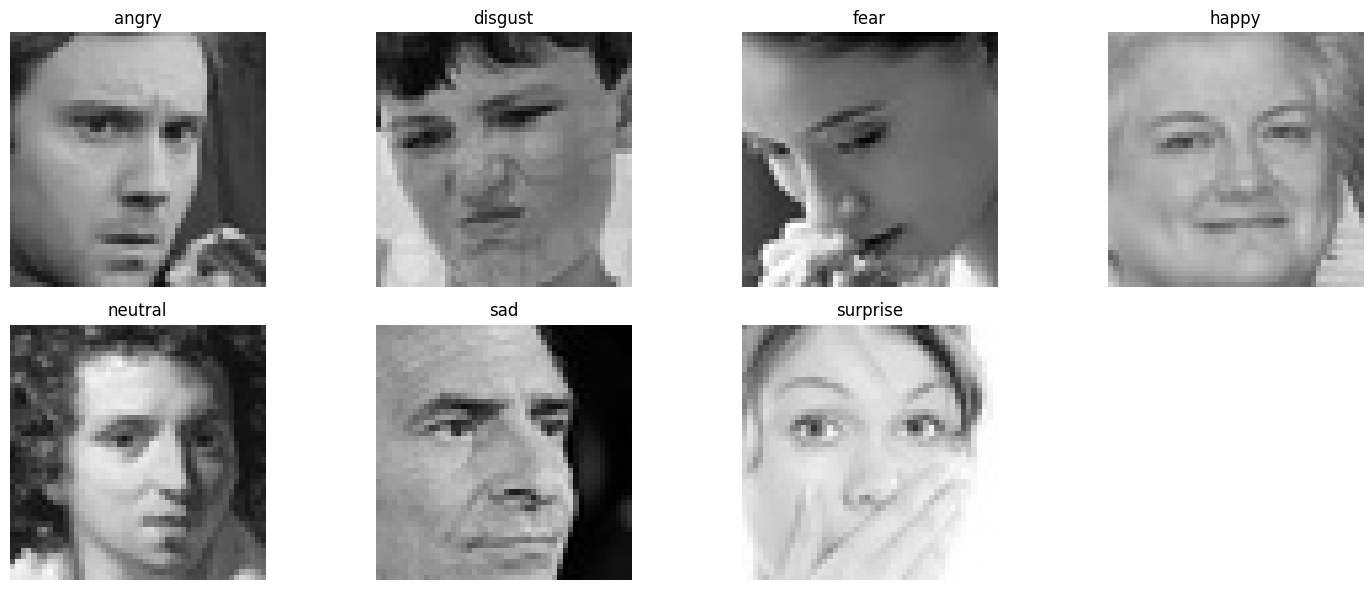

In [7]:
# Get the 7 emotion folder names
emotion_classes = os.listdir(train_dir)

# Plot one image from each folder
plt.figure(figsize=(15, 6))

for idx, emotion in enumerate(emotion_classes):
    emotion_path = os.path.join(train_dir, emotion)
    image_name = os.listdir(emotion_path)[0]  # first image
    image_path = os.path.join(emotion_path, image_name)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB

    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(emotion)
    plt.axis('off')

plt.tight_layout()
plt.show()


The FER-2013 dataset contains 48x48 pixel grayscale facial images labeled across seven emotions: angry, disgust, fear, happy, neutral, sad, and surprise.

## Model Building

In [8]:
from tensorflow.keras.layers import Input

# Build the model
model = Sequential()

# Input shape updated to (48, 48, 1) for grayscale
model.add(Input(shape=(48, 48, 1)))

# 1st Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# 2nd Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# 4th Convolution Block (optional for depth)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer: 7 classes (one for each emotion)
model.add(Dense(7, activation='softmax'))



C:\Users\Umeru\anaconda3\envs\facial_emotion_recognition\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 423,559 (1.62 MB)

 Trainable params: 422,599 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

## Training of model


In [11]:
# Train the model
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)


C:\Users\Umeru\anaconda3\envs\facial_emotion_recognition\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 226s 248ms/step - accuracy: 0.2027 - loss: 2.6304 - val_accuracy: 0.3368 - val_loss: 1.7127
Epoch 2/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.2657 - loss: 1.8351 - val_accuracy: 0.3757 - val_loss: 1.6305
Epoch 3/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.3083 - loss: 1.7426 - val_accuracy: 0.3980 - val_loss: 1.5659
Epoch 4/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.3453 - loss: 1.6641 - val_accuracy: 0.3779 - val_loss: 1.6792
Epoch 5/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.3685 - loss: 1.5973 - val_accuracy: 0.4485 - val_loss: 1.4505
Epoch 6/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.3969 - loss: 1.5456 - val_accuracy: 0.4734 - val_loss: 1.3950
Epoch 7/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.4134 - loss: 1.5144 - val_accuracy: 0.4751 - val_loss: 1.3838
Epoch 8/25
901/901 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.4300 - loss: 1.4730 

In [12]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5612 - loss: 1.1871
Validation Accuracy: 0.5607
Validation Loss: 1.1854


### Hyperparameter tuning

In [13]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(48, 48, 1)))

    # Conv Layer 1
    model.add(Conv2D(filters=hp.Choice('conv1_filters', [32, 64]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())

    # Conv Layer 2
    model.add(Conv2D(filters=hp.Choice('conv2_filters', [64, 128]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))

    # Conv Layer 3
    model.add(Conv2D(filters=hp.Choice('conv3_filters', [128, 256]),
                     kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.5, step=0.1)))

    # FC Layer
    model.add(Flatten())
    model.add(Dense(units=hp.Choice('dense_units', [64, 128]), activation='relu'))
    model.add(Dropout(hp.Float('dropout3', 0.4, 0.6, step=0.1)))

    model.add(Dense(7, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [14]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='tuner_logs',
    project_name='emotion_cnn'
)


Reloading Tuner from tuner_logs\emotion_cnn\tuner0.json


In [15]:
tuner.search(train_data, epochs=25, validation_data=val_data)


In [16]:
best_model = tuner.get_best_models(1)[0]
val_loss, val_acc = best_model.evaluate(val_data)
print(f"Best Model - Val Accuracy: {val_acc:.4f}")


C:\Users\Umeru\anaconda3\envs\facial_emotion_recognition\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5965 - loss: 1.1342
Best Model - Val Accuracy: 0.5961


### Saving the model

In [17]:
best_model.save("facial_emotion_model.keras")


### Model Accuracy

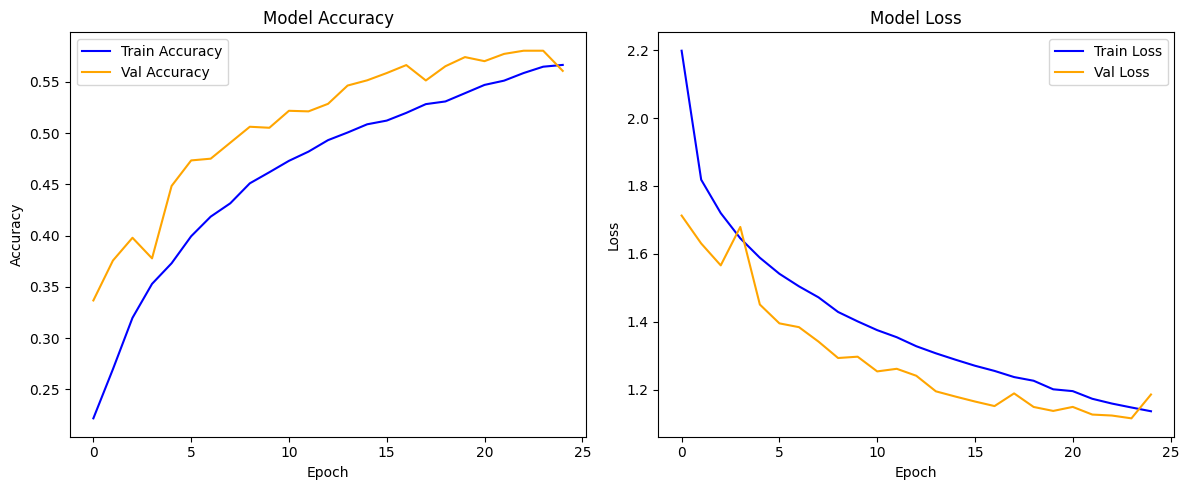

In [18]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Prediction

In [19]:
# Emotion labels (must match your class order)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Path to your validation folder
val_path = r'C:\Users\Umeru\Desktop\CNN\CNN project\Facial Emotion Recognition\validation'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


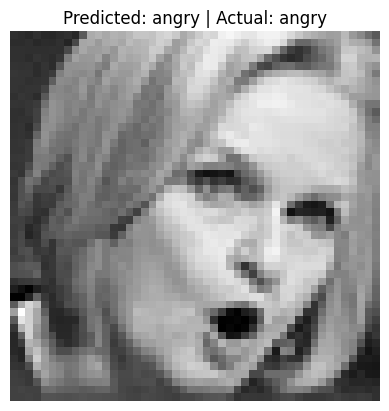

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


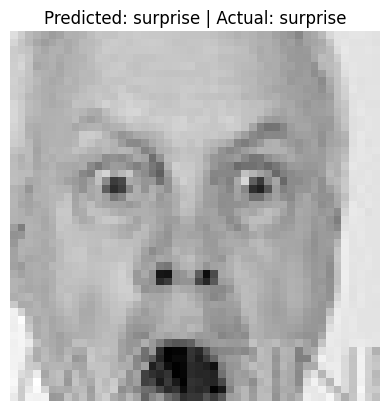

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


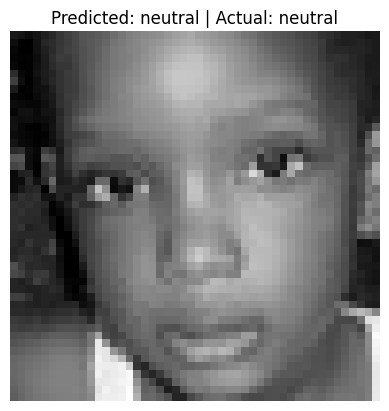

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


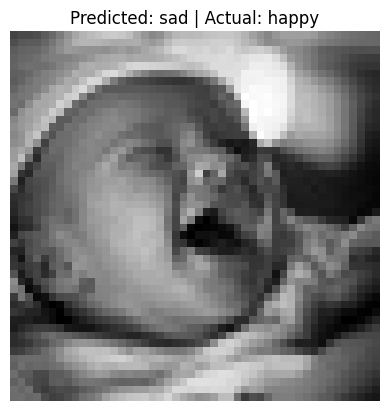

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


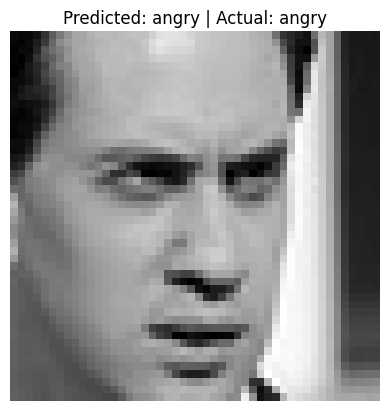

In [22]:
# Pick 5 random images from validation subfolders
for i in range(5):
    class_folder = random.choice(os.listdir(val_path))
    class_path = os.path.join(val_path, class_folder)
    img_file = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_file)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # (1, 48, 48, 1)

    # Predict
    prediction = best_model.predict(img_array)
    predicted_label = emotion_labels[np.argmax(prediction)]

    # Show image and prediction
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_label} | Actual: {class_folder}")
    plt.axis('off')
    plt.show()


###  Project Summary



In this project, I built a Facial Emotion Recognition model using the FER-2013 dataset, which contains grayscale facial images labeled with seven emotion classes: angry, disgust, fear, happy, neutral, sad, and surprise. The dataset was preprocessed and loaded using ImageDataGenerator.
I have implemented a custom CNN model from scratch and trained it on the data. Through experimentation and hyperparameter tuning, the model achieved a validation accuracy of approximately 59.6%, which is a solid result given the complexity and imbalance of the dataset.

Key tasks completed:

* Explored and visualized the dataset
* Built and trained a deep CNN model
* Applied hyperparameter tuning for performance improvement
* Evaluated the model using accuracy
* Made sample predictions on real validation images
* Saved and pushed the final model and notebook to GitHub